In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [2]:
# figure 3a
fpath = './output_files/figure3a/3a_results.csv'
savepath = './output_files/figure3a/figure3a.png'

In [3]:
df = pd.read_csv(fpath)
datasets = df['Dataset'].unique()

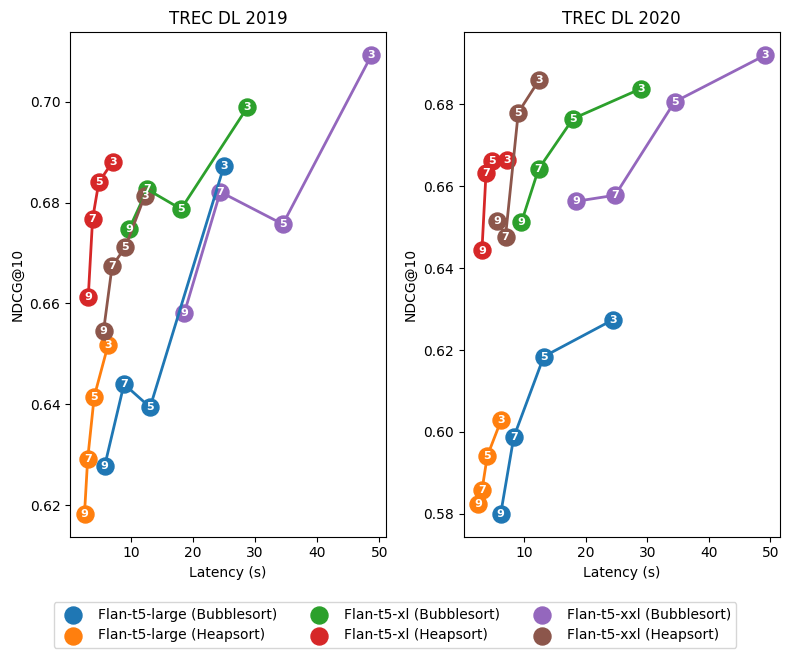

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=False)
colors = plt.cm.tab10.colors
handles = []
labels = []

for i, dataset in enumerate(datasets):
    ax = axes[i]
    subset = df[df['Dataset'] == dataset]
    
    for idx, ((model, sorting_method), group) in enumerate(subset.groupby(['Model', 'Sorting Method'])):
        line, = ax.plot(
            group['Latency'], group['NDCG@10'], 
            label=f'{model} ({sorting_method})', 
            color=colors[idx % len(colors)], 
            linewidth=2
        )
        scatter = ax.scatter(
            group['Latency'], group['NDCG@10'], 
            label=f'{model} ({sorting_method})', 
            s=150,
            color=colors[idx % len(colors)], 
            edgecolor=None 
        )
        
        for x, y, c_value in zip(group['Latency'], group['NDCG@10'], group['C']):
            ax.text(x, y, f'{c_value}', fontsize=8, ha='center', va='center', color='white', weight='bold')

        if f'{model} ({sorting_method})' not in labels:
            handles.append(scatter)
            labels.append(f'{model} ({sorting_method})')
    
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Latency (s)')
    ax.set_ylabel('NDCG@10')
    ax.grid(False)

fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
fig.savefig(savepath, dpi=300, bbox_inches='tight')  # Save the figure

In [7]:
# figure 3b
fpath = './output_files/figure3b/3b_results.csv'
savepath = './output_files/figure3b/figure3b.png'

In [8]:
df = pd.read_csv(fpath)
datasets = df['Dataset'].unique()

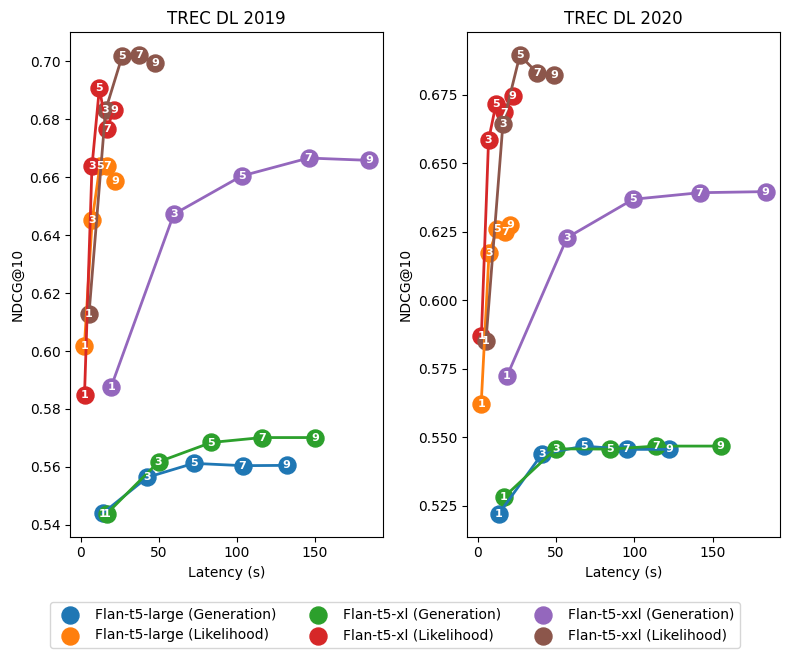

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=False)
colors = plt.cm.tab10.colors
handles = []
labels = []

for i, dataset in enumerate(datasets):
    ax = axes[i]
    subset = df[df['Dataset'] == dataset]
    
    for idx, ((model, sorting_method), group) in enumerate(subset.groupby(['Model', 'Sorting Method'])):
        line, = ax.plot(
            group['Latency'], group['NDCG@10'], 
            label=f'{model} ({sorting_method})', 
            color=colors[idx % len(colors)], 
            linewidth=2
        )
        scatter = ax.scatter(
            group['Latency'], group['NDCG@10'], 
            label=f'{model} ({sorting_method})', 
            s=150,
            color=colors[idx % len(colors)], 
            edgecolor=None 
        )
        
        for x, y, c_value in zip(group['Latency'], group['NDCG@10'], group['R']):
            ax.text(x, y, f'{c_value}', fontsize=8, ha='center', va='center', color='white', weight='bold')

        if f'{model} ({sorting_method})' not in labels:
            handles.append(scatter)
            labels.append(f'{model} ({sorting_method})')
    
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Latency (s)')
    ax.set_ylabel('NDCG@10')
    ax.grid(False)

fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
fig.savefig(savepath, dpi=300, bbox_inches='tight')  # Save the figure

In [10]:
# figure 4
fpath = './output_files/figure4/figure4_results.csv'
savepath = './output_files/figure4/figure4.png'

In [11]:
df = pd.read_csv(fpath)

In [12]:
df['final_method'] = df.apply(lambda x: f"{x['Ranking Method']}.{x['Sorting Method']}", axis=1)

In [13]:
shuffle_method_map = {
    np.nan: 'BM25',
    'Random': 'RandomBM25',
    'Inverse': 'InverseBM25'
}

In [14]:
df['final_shuffle_method'] = df['Shuffle'].apply(lambda x: shuffle_method_map[x])

In [15]:
df = df[['Dataset', 'final_method', 'final_shuffle_method', 'NDCG@10']]

In [16]:
order = ['listwise.generate', 'listwise.likelihood', 'pairwise.heapsort', 'setwise.heapsort', 'pairwise.bubblesort', 'setwise.bubblesort']

/tmp/ipykernel_2903032/1612394486.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['final_method'] = pd.Categorical(subset['final_method'], categories=order, ordered=True)
/tmp/ipykernel_2903032/1612394486.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = subset.pivot_table(index='final_method', columns='final_shuffle_method', values='NDCG@10')
/tmp/ipykernel_2903032/1612394486.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

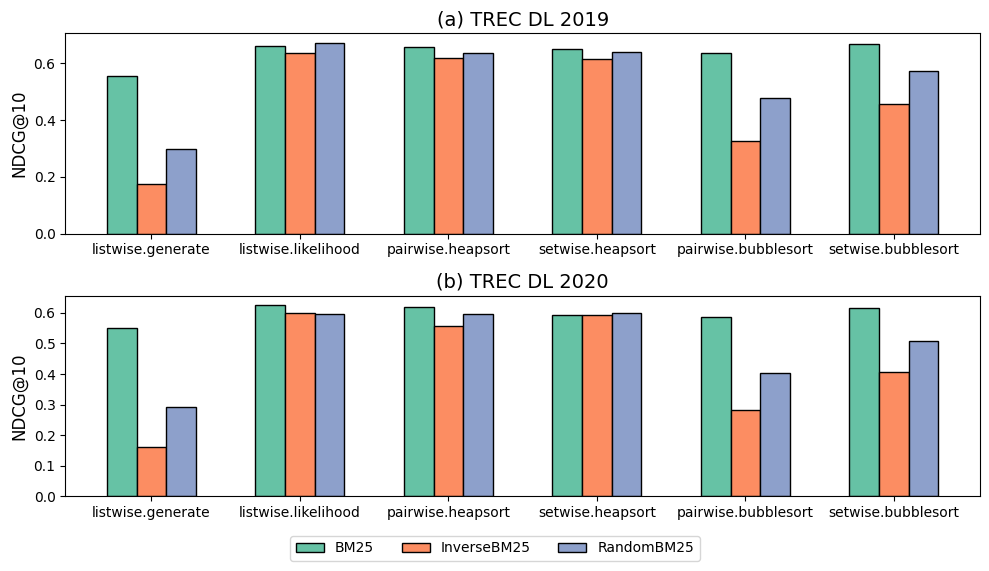

In [17]:
fig, axes = plt.subplots(nrows=len(datasets), ncols=1, figsize=(10, 6), sharex=False)


# colors = plt.cm.tab10.colors
palette = sns.color_palette("Set2", 8)
bar_width = 0.2

handles = []
labels = []

for i, dataset in enumerate(datasets):
    if i == 0:
        subfigure = 'a'
    else:
        subfigure = 'b'
    ax = axes[i]
    subset = df[df['Dataset'] == dataset]
    subset['final_method'] = pd.Categorical(subset['final_method'], categories=order, ordered=True)
    pivot_df = subset.pivot_table(index='final_method', columns='final_shuffle_method', values='NDCG@10')

    x = np.arange(len(pivot_df.index))
    shuffle_methods = pivot_df.columns

    for j, shuffle_method in enumerate(shuffle_methods):
        bars = ax.bar(x + j * bar_width, pivot_df[shuffle_method], bar_width, label=shuffle_method, color=palette[j % len(palette)], edgecolor='black')
        if i == 0:
            handles.append(bars[0])
            labels.append(shuffle_method)

    ax.set_ylabel('NDCG@10', fontsize=12)
    ax.set_xticks(x + bar_width * (len(shuffle_methods) - 1) / 2)
    ax.set_xticklabels(pivot_df.index, fontsize=10)
    ax.set_title(f'({subfigure}) {dataset}', fontsize=14)

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.005), ncol=len(shuffle_methods), fontsize=10, title=None)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Leave space for the title and legend
fig.savefig(savepath, dpi=300, bbox_inches='tight')  # Save the figure

In [19]:
# figure for table 4
df = pd.read_csv('./output_files/table4/table4.csv')

In [20]:
model_pairs = [('Llama 3.1-8B', 'Llama 3.1-8B-Instruct'), ('Llama 2 7B', 'Vicuna 7B'), ('Llama 2 13B', 'Vicuna 13B')]

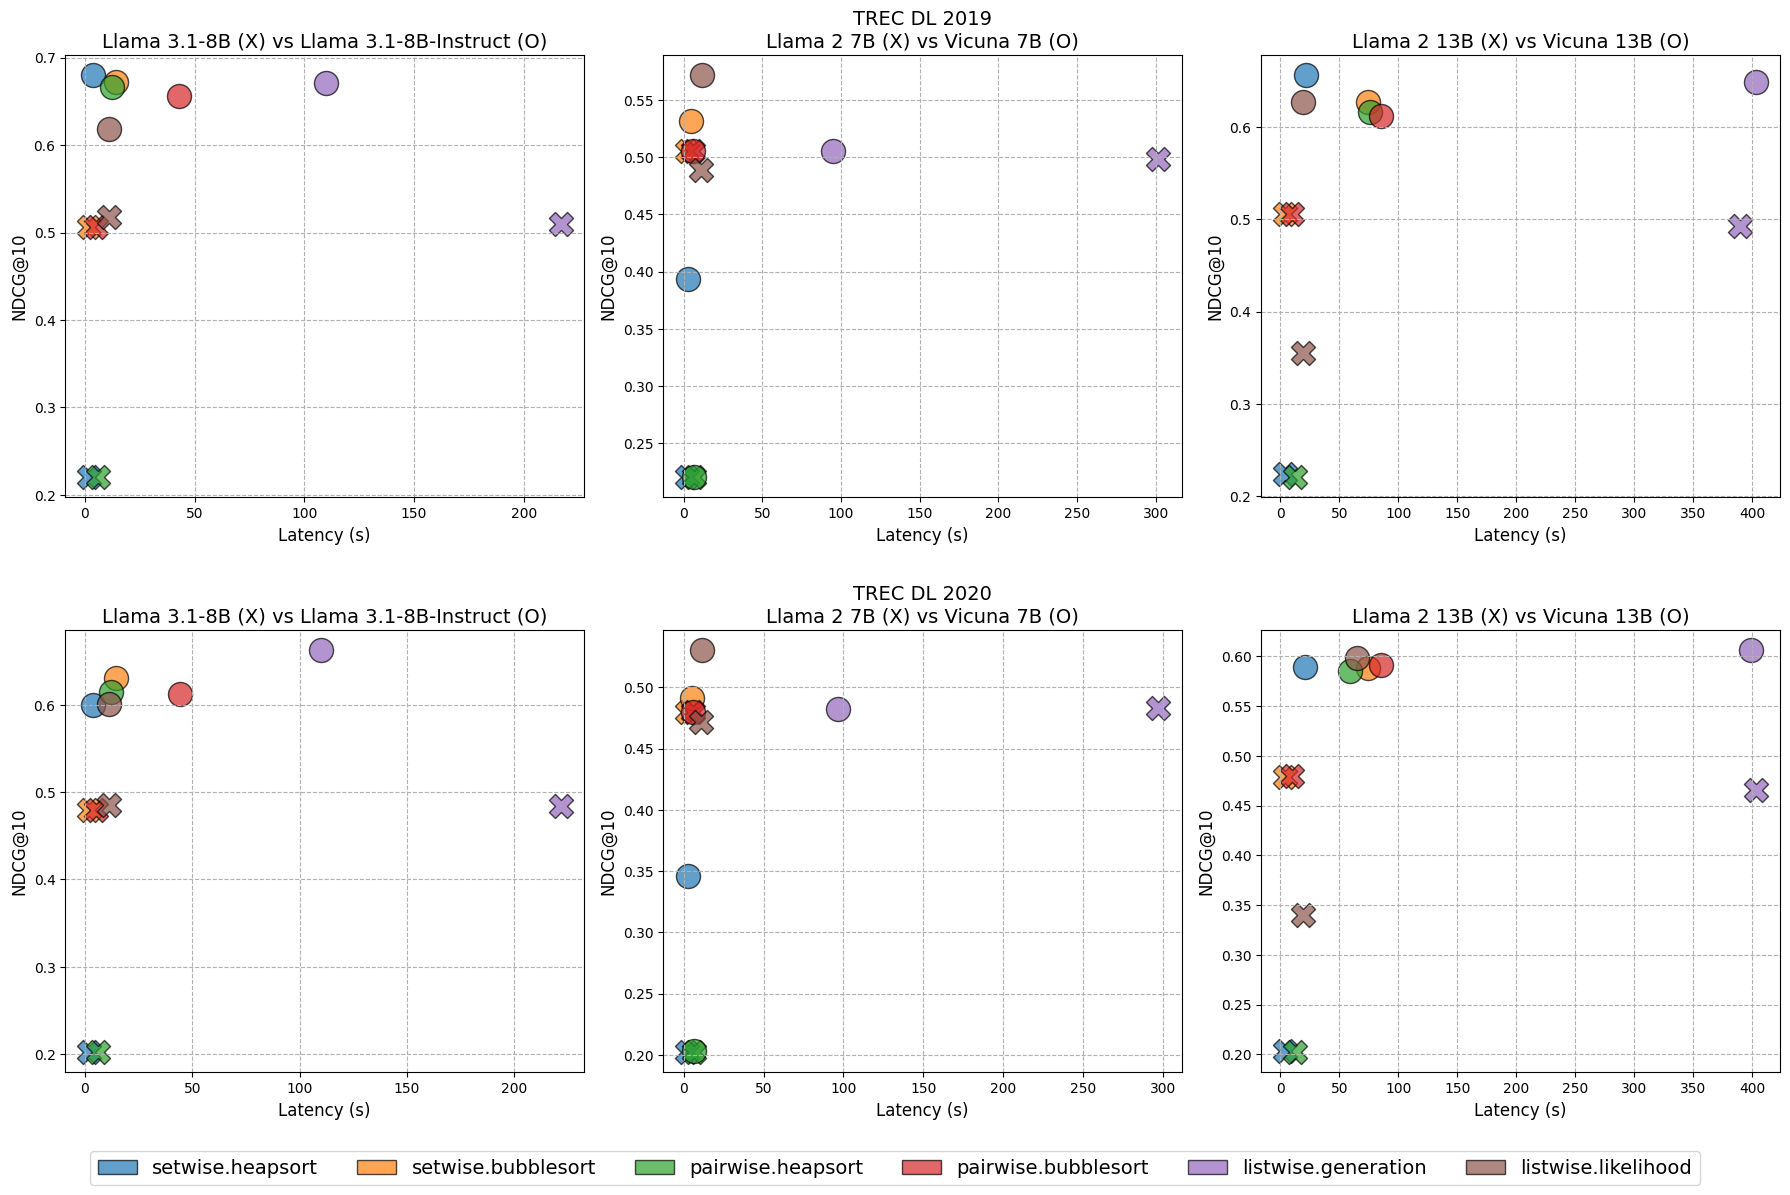

In [22]:
markers = ['X', 'o']
colors = plt.cm.tab10.colors
marker_size = 300

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
alpha = 0.7


for i, (model1, model2) in enumerate(model_pairs):
    for j, year in enumerate(["2019", "2020"]): 
        ax = axes[i + j * 3] 
        df_pair = df[df['Models'].isin([model1, model2])]
        
        for k, method in enumerate(df['Methods'].unique()):
            method_data = df_pair[df_pair['Methods'] == method]
            
            if method_data.empty:
                continue
            
            model1_data = method_data[method_data['Models'] == model1]
            model2_data = method_data[method_data['Models'] == model2]
            
            ndcg_model1 = model1_data[f"{year}-NDCG@10"].values[0]
            latency_model1 = model1_data[f"{year}-Latency(s)"].values[0]
            if j == 0 and i == 0:
                ax.scatter(latency_model1, ndcg_model1, color=colors[k], marker=markers[0],
                        label=method, s=marker_size, alpha=alpha, edgecolor='black', linewidth=1)
            else:
                ax.scatter(latency_model1, ndcg_model1, color=colors[k], marker=markers[0], s=marker_size, alpha=alpha, edgecolor='black', linewidth=1)
            
            ndcg_model2 = model2_data[f"{year}-NDCG@10"].values[0]
            latency_model2 = model2_data[f"{year}-Latency(s)"].values[0]
            ax.scatter(latency_model2, ndcg_model2, color=colors[k], marker=markers[1], s=marker_size, alpha=alpha, edgecolor='black', linewidth=1)
        
        ax.set_ylabel("NDCG@10", fontsize=12)
        ax.set_xlabel("Latency (s)", fontsize=12)
        if i == 1:
            ax.set_title(f"TREC DL {year}\n{model1} (X) vs {model2} (O)", fontsize=14)
        else:
            ax.set_title(f"{model1} (X) vs {model2} (O)", fontsize=14)
        ax.grid(True, linestyle='--')


legend_handles = []
for k, method in enumerate(df['Methods'].unique()):
    rect = mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[k], edgecolor='black', alpha=alpha)
    legend_handles.append(rect)

fig.legend(legend_handles, df['Methods'].unique(), loc="lower center", ncol=len(df['Methods']), fontsize=14)
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space for the legend at the bottom
plt.subplots_adjust(hspace=0.3)
plt.savefig('./output_files/table4/fig.png', dpi=300)
plt.show()
